# Unidade 2 Trabalho 2 - Explorando o Algoritmo A*

<h3> Objetivos</h3>

 - Criar uma estratégia para mapeamento das rotas;
 - Todos os pontos devem ser atendidos;
 - A distância das rotas deve ser minimizado; e
 - Usar o Algoritmo A*, Dijkstra e Dijkstra + min-heap para o cálculo das rotas (networkx, osmnx).

Os requisitos estão descritos no arquivo: [U2T2.pdf](./U2T2.pdf)

### DijkstrasAlgorithm

In [1]:
# O(V^2 + E) time | O(V) space - where V is the number of vertices and E is the number of edges in the input graph
def dijkstrasAlgorithm(start, edges):
    """
    Implements Dijkstra's algorithm to find the shortest path from a starting node to all other nodes in a graph.

    Args:
        start (int): The starting node index.
        edges (list of list): Adjacency list representing the graph. Each index corresponds to a vertex,
                              and each entry is a list of pairs [destination, weight].

    Returns:
        list: A list of the shortest distances from the starting node to each node. If a node is not reachable,
              the distance is -1.
    """
    numberOfVertices = len(edges)

    # Initialize the minimum distances for all vertices as infinity
    # except the starting vertex which is set to 0.
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0

    # Keep track of visited nodes to avoid reprocessing them.
    visited = set()

    # Continue processing nodes until all have been visited.
    while len(visited) != numberOfVertices:
        # Find the vertex with the smallest known distance that has not been visited.
        vertex, currentMinDistance = getVertexWithMinDistance(minDistances, visited)

        # If the smallest distance is infinity, all remaining vertices are unreachable.
        if currentMinDistance == float("inf"):
            break

        # Mark the current vertex as visited.
        visited.add(vertex)

        # Iterate through all the neighbors of the current vertex.
        for edge in edges[vertex]:
            destination, distanceToDestination = edge

            # Skip the neighbor if it has already been visited.
            if destination in visited:
                continue

            # Calculate the new potential path distance to the neighbor.
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]

            # Update the shortest distance to the neighbor if the new path is shorter.
            if newPathDistance < currentDestinationDistance:
                minDistances[destination] = newPathDistance

    # Replace any remaining infinity distances with -1 to indicate unreachable nodes.
    return list(map(lambda x: -1 if x == float("inf") else x, minDistances))


def getVertexWithMinDistance(distances, visited):
    """
    Helper function to find the vertex with the smallest known distance that has not been visited.

    Args:
        distances (list): A list of the shortest known distances to each vertex.
        visited (set): A set of vertices that have already been visited.

    Returns:
        tuple: The index of the vertex with the smallest distance and its distance value.
    """
    currentMinDistance = float("inf")
    vertex = -1

    # Iterate over all vertices to find the one with the smallest distance.
    for vertexIdx, distance in enumerate(distances):
        # Skip the vertex if it has already been visited.
        if vertexIdx in visited:
            continue

        # Update the current minimum distance and vertex if a smaller distance is found.
        if distance <= currentMinDistance:
            vertex = vertexIdx
            currentMinDistance = distance

    return vertex, currentMinDistance

### MinHeap

In [2]:
class MinHeap:
    """
    MinHeap class: Implements a MinHeap data structure to efficiently manage vertices and their distances
    for algorithms like Dijkstra. This implementation keeps track of the position of each vertex using
    a vertex map for constant-time lookups and updates.
    """
    def __init__(self, array):
        """
        Initializes the MinHeap with an input array of (vertex, distance) pairs.

        Args:
            array (list): List of tuples where each tuple is (vertex, distance).
                          The distance is typically initialized to infinity except for the starting vertex.

        Attributes:
            vertexMap (dict): Maps each vertex to its position in the heap for quick access.
            heap (list): List representing the binary heap as an array.
        """
        # Create a vertex map: Maps vertices to their indices in the heap.
        self.vertexMap = {idx: idx for idx in range(len(array))}

        # Build the heap from the input array to satisfy the heap property.
        self.heap = self.buildHeap(array)

    def isEmpty(self):
        """
        Checks if the heap is empty.

        Returns:
            bool: True if the heap is empty, False otherwise.
        """
        return len(self.heap) == 0

    def buildHeap(self, array):
        """
        Builds the heap from an input array in O(n) time.

        Args:
            array (list): List of (vertex, distance) pairs.

        Returns:
            list: The input array transformed into a valid MinHeap.
        """
        # Start from the first parent node and sift down each node.
        firstParentIdx = (len(array) - 2) // 2
        for currentIdx in reversed(range(firstParentIdx + 1)):
            self.siftDown(currentIdx, len(array) - 1, array)
        return array

    def siftDown(self, currentIdx, endIdx, heap):
        """
        Restores the heap property by "sifting down" a node into its correct position.

        Args:
            currentIdx (int): Index of the node to sift down.
            endIdx (int): Last index in the heap.
            heap (list): The heap array.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        childOneIdx = currentIdx * 2 + 1  # Index of the first child
        while childOneIdx <= endIdx:
            # Determine the index of the second child
            childTwoIdx = currentIdx * 2 + 2 if currentIdx * 2 + 2 <= endIdx else -1

            # Choose the smaller child to maintain the min-heap property
            if childTwoIdx != -1 and heap[childTwoIdx][1] < heap[childOneIdx][1]:
                idxToSwap = childTwoIdx
            else:
                idxToSwap = childOneIdx

            # Swap if the child is smaller than the current node
            if heap[idxToSwap][1] < heap[currentIdx][1]:
                self.swap(currentIdx, idxToSwap, heap)
                currentIdx = idxToSwap  # Move to the swapped position
                childOneIdx = currentIdx * 2 + 1  # Update the first child index
            else:
                return

    def siftUp(self, currentIdx, heap):
        """
        Restores the heap property by "sifting up" a node into its correct position.

        Args:
            currentIdx (int): Index of the node to sift up.
            heap (list): The heap array.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        parentIdx = (currentIdx - 1) // 2  # Calculate parent index
        while currentIdx > 0 and heap[currentIdx][1] < heap[parentIdx][1]:
            self.swap(currentIdx, parentIdx, heap)  # Swap with parent
            currentIdx = parentIdx  # Move to the parent's position
            parentIdx = (currentIdx - 1) // 2

    def remove(self):
        """
        Removes and returns the smallest element (root) in the heap.

        Returns:
            tuple: The (vertex, distance) pair with the smallest distance.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        if self.isEmpty():
            return None

        # Swap the root with the last element and remove it
        self.swap(0, len(self.heap) - 1, self.heap)
        vertex, distance = self.heap.pop()
        self.vertexMap.pop(vertex)  # Remove the vertex from the map

        # Restore the heap property
        self.siftDown(0, len(self.heap) - 1, self.heap)
        return vertex, distance

    def swap(self, i, j, heap):
        """
        Swaps two nodes in the heap and updates their positions in the vertexMap.

        Args:
            i (int): Index of the first node.
            j (int): Index of the second node.
            heap (list): The heap array.
        """
        self.vertexMap[heap[i][0]] = j  # Update vertexMap for heap[i]
        self.vertexMap[heap[j][0]] = i  # Update vertexMap for heap[j]
        heap[i], heap[j] = heap[j], heap[i]  # Swap the nodes in the heap

    def update(self, vertex, value):
        """
        Updates the distance of a given vertex and restores the heap property.

        Args:
            vertex (int): The vertex whose distance is to be updated.
            value (int): The new distance value.

        Complexity:
            Time: O(log(n))
            Space: O(1)
        """
        # Update the heap with the new (vertex, value) pair
        self.heap[self.vertexMap[vertex]] = (vertex, value)
        # Restore the heap property by sifting up the updated node
        self.siftUp(self.vertexMap[vertex], self.heap)

### DijkstrasAlgorithmMinHeap

In [3]:
# O((v + e) * log(v)) time | O(v) space — where v is the number
# of vertices and e is the number of edges in the input graph
def dijkstrasAlgorithmMinHeap(start, edges):
    """
    Implements Dijkstra's algorithm to find the shortest paths from a starting vertex to all other vertices
    in a weighted graph. The graph is represented using an adjacency list.

    Args:
        start (int): The starting vertex index.
        edges (list of list): An adjacency list where each index represents a vertex, and each entry
                              is a list of [destination, weight] pairs.

    Returns:
        list: A list of minimum distances from the starting vertex to each vertex in the graph.
              If a vertex is unreachable, its distance is represented as -1.
    """
    # Step 1: Initialize the number of vertices in the graph
    numberOfVertices = len(edges)

    # Step 2: Initialize the minimum distances with infinity
    # Set the starting vertex's distance to 0
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0

    # Step 3: Initialize the MinHeap to track the vertices and their current shortest distances
    minDistancesHeap = MinHeap([(idx, float("inf")) for idx in range(numberOfVertices)])
    minDistancesHeap.update(start, 0)  # Update the starting vertex's distance to 0

    # Step 4: Process vertices until the heap is empty
    while not minDistancesHeap.isEmpty():
        # Extract the vertex with the smallest known distance
        vertex, currentMinDistance = minDistancesHeap.remove()

        # If the current distance is infinity, no further reachable vertices exist
        if currentMinDistance == float("inf"):
            break

        # Step 5: Relaxation - Update distances for all neighboring vertices
        for edge in edges[vertex]:
            destination, distanceToDestination = edge  # Extract neighbor and weight

            # Calculate the new potential path distance
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]

            # If the new path is shorter, update the distance and the heap
            if newPathDistance < currentDestinationDistance:
                minDistances[destination] = newPathDistance
                minDistancesHeap.update(destination, newPathDistance)

    # Step 6: Convert unreachable vertices' distances from infinity to -1
    return list(map(lambda x: -1 if x == float("inf") else x, minDistances))

### Código base

In [ ]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
# from codecarbon import EmissionsTracker
import os
# import time
# import random

# --- FUNÇÕES AUXILIARES ---
def graph_to_indexed_adjacency_list(G, node_to_index, weight_attr='length'):
    adj_list = [[] for _ in range(len(node_to_index))]
    for u, v, data in G.edges(data=True):
        weight = data.get(weight_attr, 1)
        ui = node_to_index[u]
        vi = node_to_index[v]
        adj_list[ui].append([vi, weight])
        if not G.is_directed():
            adj_list[vi].append([ui, weight])
    return adj_list


def calcular_emissao(distancia_km):
    return distancia_km * 0.140  # kg CO2/km

# --- CARGA DOS DADOS ---
pontos_df = pd.read_csv("dados/centroid_filtered.csv")  # CSV com colunas: id, latitude, longitude
# pontos_df = pd.read_csv("dados/teste.csv")  # CSV com colunas: id, latitude, longitude ----------------- menos rotas
pontos_df.rename(columns={'Lon': 'longitude', 'Lat': 'latitude'}, inplace=True)
estacao_central = (-5.79448, -35.211)  # Exemplo: Centro de Zoonoses de Natal

# --- CRIAÇÃO DO GRAFO ---
G = ox.graph_from_point(estacao_central, dist=10000, network_type='drive')
G_proj = ox.project_graph(G)

# --- MAPEAMENTO DOS PONTOS PARA O GRAFO ---
def geoprojetar(df, G_proj):
    geometries = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometries, crs="EPSG:4326")
    gdf = gdf.to_crs(G_proj.graph['crs'])
    return gdf

gdf_pontos = geoprojetar(pontos_df, G_proj)

# Mapeamento para o nó mais próximo
gdf_pontos['node'] = gdf_pontos.geometry.apply(lambda point: ox.distance.nearest_nodes(G_proj, point.x, point.y))

# Estacao Central
x, y = ox.geocode(estacao_central)
estacao_node = ox.distance.nearest_nodes(G_proj, y, x)

# --- CLUSTERIZAÇÃO DOS PONTOS ---
n_pontos = len(gdf_pontos)
n_clusters = min(10, n_pontos)  # usa no máximo 10, ou menos se houver menos pontos

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
gdf_pontos['cluster'] = kmeans.fit_predict(gdf_pontos[['longitude', 'latitude']])

# --- PREPARAÇÃO PARA ALGORITMOS ---
node_list = list(G_proj.nodes)
node_to_index = {node: idx for idx, node in enumerate(node_list)}
index_to_node = {idx: node for node, idx in node_to_index.items()}
adj_list = graph_to_indexed_adjacency_list(G_proj, node_to_index)
start_idx = node_to_index[estacao_node]

# # --- CÁLCULO DAS ROTAS ---
# resultados = []

# for algoritmo in ["Tradicional", "MinHeap", "A*"]:
#     tempo_total = 0
#     distancia_total = 0
#     tracker = EmissionsTracker(project_name=algoritmo, output_dir="emissions", save_to_file=True)
#     tracker.start()
#     for c in range(10):
#         pontos = gdf_pontos[gdf_pontos.cluster == c]['node'].tolist()
#         random.shuffle(pontos)  # pode ser otimizado com TSP futuramente
#         rota = [estacao_node] + pontos + [estacao_node]

#         for i in range(len(rota) - 1):
#             origem = rota[i]
#             destino = rota[i + 1]

#             inicio = time.time()
#             if algoritmo == "Tradicional":
#                 dists = dijkstrasAlgorithm(node_to_index[origem], adj_list)
#                 distancia = dists[node_to_index[destino]]
#             elif algoritmo == "MinHeap":
#                 dists = dijkstrasAlgorithmMinHeap(node_to_index[origem], adj_list)
#                 distancia = dists[node_to_index[destino]]
#             else:  # A*
#                 distancia = nx.astar_path_length(G_proj, origem, destino, weight='length')
#             fim = time.time()

#             tempo_total += (fim - inicio)
#             distancia_total += distancia
#     tracker.stop()
#     resultados.append({
#         'Algoritmo': algoritmo,
#         'TempoTotal(s)': round(tempo_total, 2),
#         'DistanciaTotal(km)': round(distancia_total / 1000, 2),
#         'CO2(kg)': round(calcular_emissao(distancia_total / 1000), 2)
#     })




### Dijkstras Tradicional

In [ ]:
from codecarbon import EmissionsTracker
import time
import random

# --- CONFIGURAÇÃO INICIAL ---
arquivo = "emissions/tradicional.csv"

# Verifica se o arquivo de emissões já existe e o apaga para evitar sobrescrita não intencional
if os.path.exists(arquivo):
    os.remove(arquivo)
    print(f"O arquivo '{arquivo}' foi deletado.")
    
# Cria a pasta 'emissions' se ela ainda não existir
os.makedirs("emissions", exist_ok=True)

tempo_total = 0
distancia_total = 0
tracker = EmissionsTracker(project_name="Tradicional", save_to_file=True, output_file=arquivo)
tracker.start()

for c in range(10):
    pontos = gdf_pontos[gdf_pontos.cluster == c]['node'].tolist()
    random.shuffle(pontos)
    rota = [estacao_node] + pontos + [estacao_node]

    for i in range(len(rota) - 1):
        origem = rota[i]
        destino = rota[i + 1]

        inicio = time.time()
        dists = dijkstrasAlgorithm(node_to_index[origem], adj_list)
        distancia = dists[node_to_index[destino]]
        fim = time.time()

        tempo_total += (fim - inicio)
        distancia_total += distancia

tracker.stop()

# --- PEGANDO emissions DO CSV GERADO ---
df_emissions = pd.read_csv(arquivo)
co2_emission = df_emissions[df_emissions['project_name'] == 'Tradicional']['emissions'].iloc[-1]

resultados = []
resultados.append({
    'Algoritmo': 'Tradicional',
    'TempoTotal(s)': round(tempo_total, 2),
    'DistanciaTotal(km)': round(distancia_total / 1000, 2),
    'CO2(kg)': round(co2_emission, 6)
})


[codecarbon WARNING @ 17:58:25] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 17:58:25] [setup] RAM Tracking...
[codecarbon INFO @ 17:58:25] [setup] CPU Tracking...
[codecarbon WARNING @ 17:58:26] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 17:58:26] CPU Model on constant consumption mode: AMD Ryzen 5 5600G with Radeon Graphics
[codecarbon WARNING @ 17:58:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 17:58:26] [setup] GPU Tracking...
[codecarbon INFO @ 17:58:26] No GPU found.
[codecarbon INFO @ 17:58:26] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 17:58:26] >>> Tracker's metadata:
[code

[codecarbon INFO @ 18:34:53] Energy consumed for RAM : 0.008285 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 18:34:53] Delta energy consumed for CPU with constant : 0.001561 kWh, power : 390.0 W
[codecarbon INFO @ 18:34:53] Energy consumed for All CPU : 0.324278 kWh
[codecarbon INFO @ 18:34:53] 0.332564 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:35:08] Energy consumed for RAM : 0.008327 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 18:35:08] Delta energy consumed for CPU with constant : 0.001625 kWh, power : 390.0 W
[codecarbon INFO @ 18:35:08] Energy consumed for All CPU : 0.325904 kWh
[codecarbon INFO @ 18:35:08] 0.334231 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:35:23] Energy consumed for RAM : 0.008369 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 18:35:23] Delta energy consumed for CPU with constant : 0.001626 kWh, power : 390.0 W
[codecarbon INFO @ 18:35:23] Energy consumed for All CPU : 0.327530 kWh
[codecarbon INFO @ 18:35:23] 0.335898 k

### Dijkstras MinHeap

In [52]:
# --- CONFIGURAÇÃO INICIAL ---
arquivo = "emissions/minheap.csv"

# Verifica se o arquivo de emissões já existe e o apaga para evitar sobrescrita não intencional
if os.path.exists(arquivo):
    os.remove(arquivo)
    print(f"O arquivo '{arquivo}' foi deletado.")
    
# Cria a pasta 'emissions' se ela ainda não existir
os.makedirs("emissions", exist_ok=True)

tempo_total = 0
distancia_total = 0
tracker = EmissionsTracker(project_name="MinHeap", save_to_file=True, output_file=arquivo)
tracker.start()

for c in range(10):
    pontos = gdf_pontos[gdf_pontos.cluster == c]['node'].tolist()
    random.shuffle(pontos)
    rota = [estacao_node] + pontos + [estacao_node]

    for i in range(len(rota) - 1):
        origem = rota[i]
        destino = rota[i + 1]

        inicio = time.time()
        dists = dijkstrasAlgorithmMinHeap(node_to_index[origem], adj_list)
        distancia = dists[node_to_index[destino]]
        fim = time.time()

        tempo_total += (fim - inicio)
        distancia_total += distancia

tracker.stop()

# --- PEGANDO emissions DO CSV GERADO ---
df_emissions = pd.read_csv(arquivo)
co2_emission = df_emissions[df_emissions['project_name'] == 'MinHeap']['emissions'].iloc[-1]

resultados.append({
    'Algoritmo': 'MinHeap',
    'TempoTotal(s)': round(tempo_total, 2),
    'DistanciaTotal(km)': round(distancia_total / 1000, 2),
    'CO2(kg)': round(co2_emission, 6)
})


[codecarbon WARNING @ 20:11:21] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 20:11:21] [setup] RAM Tracking...
[codecarbon INFO @ 20:11:21] [setup] CPU Tracking...


O arquivo 'emissions/minheap.csv' foi deletado.


[codecarbon WARNING @ 20:11:23] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 20:11:23] CPU Model on constant consumption mode: AMD Ryzen 5 5600G with Radeon Graphics
[codecarbon WARNING @ 20:11:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 20:11:23] [setup] GPU Tracking...
[codecarbon INFO @ 20:11:23] No GPU found.
[codecarbon INFO @ 20:11:23] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 20:11:23] >>> Tracker's metadata:
[codecarbon INFO @ 20:11:23]   Platform system: Windows-11-10.0.26100-SP0
[codecarbon INFO @ 20:11:23]   Python version: 3.12.2
[codecarbon INFO @ 20:11:23]   CodeCarbon version: 3.0.1
[codecarbon INFO @ 20:11:23]

### A* (A-estrela)

In [53]:
# --- CONFIGURAÇÃO INICIAL ---
arquivo = "emissions/astar.csv"

# Verifica se o arquivo de emissões já existe e o apaga para evitar sobrescrita não intencional
if os.path.exists(arquivo):
    os.remove(arquivo)
    print(f"O arquivo '{arquivo}' foi deletado.")
    
# Cria a pasta 'emissions' se ela ainda não existir
os.makedirs("emissions", exist_ok=True)

tempo_total = 0
distancia_total = 0
tracker = EmissionsTracker(project_name="A*", save_to_file=True, output_file=arquivo)
tracker.start()

for c in range(10):
    pontos = gdf_pontos[gdf_pontos.cluster == c]['node'].tolist()
    random.shuffle(pontos)
    rota = [estacao_node] + pontos + [estacao_node]

    for i in range(len(rota) - 1):
        origem = rota[i]
        destino = rota[i + 1]

        inicio = time.time()
        distancia = nx.astar_path_length(G_proj, origem, destino, weight='length')
        fim = time.time()

        tempo_total += (fim - inicio)
        distancia_total += distancia

tracker.stop()

# --- PEGANDO emissions DO CSV GERADO ---
df_emissions = pd.read_csv(arquivo)
co2_emission = df_emissions[df_emissions['project_name'] == 'A*']['emissions'].iloc[-1]

resultados.append({
    'Algoritmo': 'A*',
    'TempoTotal(s)': round(tempo_total, 2),
    'DistanciaTotal(km)': round(distancia_total / 1000, 2),
    'CO2(kg)': round(co2_emission, 6)
})


[codecarbon WARNING @ 20:11:40] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 20:11:40] [setup] RAM Tracking...
[codecarbon INFO @ 20:11:40] [setup] CPU Tracking...


O arquivo 'emissions/astar.csv' foi deletado.


[codecarbon INFO @ 20:11:41] Energy consumed for RAM : 0.024405 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 20:11:41] Delta energy consumed for CPU with constant : 0.001572 kWh, power : 390.0 W
[codecarbon INFO @ 20:11:41] Energy consumed for All CPU : 0.953211 kWh
[codecarbon INFO @ 20:11:41] 0.977616 kWh of electricity used since the beginning.
[codecarbon WARNING @ 20:11:41] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 20:11:41] CPU Model on constant consumption mode: AMD Ryzen 5 5600G with Radeon Graphics
[codecarbon WARNING @ 20:11:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 20:11:41] [setup] GPU Tracking...
[codecarbon INFO @ 20:11:41] No GPU found.
[codecarbon INFO @ 20:11:41] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Meth

### Resultados

     Algoritmo  TempoTotal(s)  DistanciaTotal(km)   CO2(kg)
0  Tradicional        2172.67              433.66  0.023042
1      MinHeap          12.22              433.66  0.000134
2           A*           1.19              433.66  0.000000


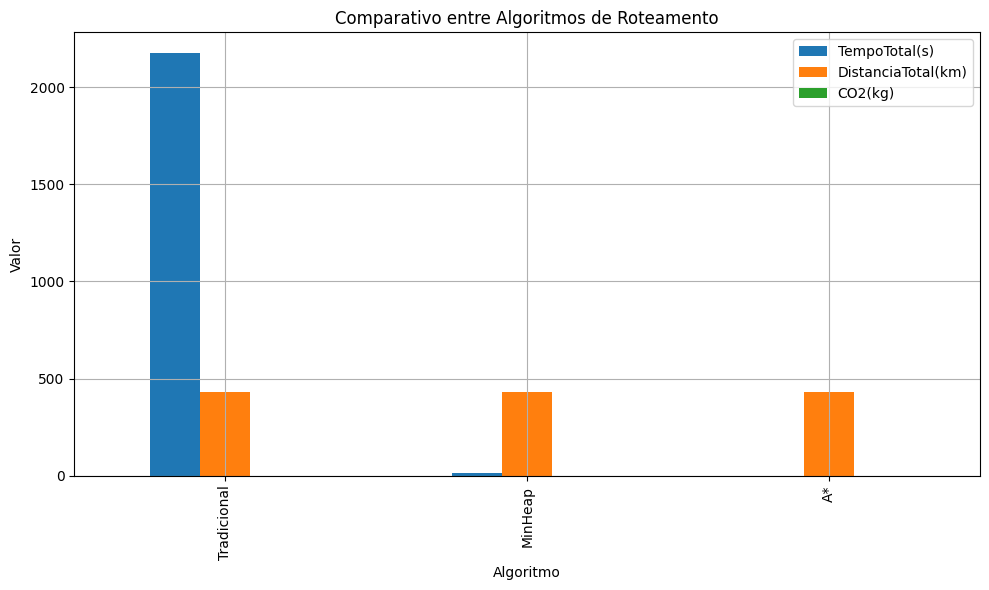

In [ ]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

df_resultados.to_csv("resultados/resultados_comparacao.csv", index=False)
df_resultados.plot(x='Algoritmo', y=['TempoTotal(s)', 'DistanciaTotal(km)', 'CO2(kg)'], kind='bar', figsize=(10, 6))
plt.title("Comparativo entre Algoritmos de Roteamento")
plt.ylabel("Valor")
plt.grid(True)
plt.tight_layout()
plt.savefig("grafico_comparativo.png")
plt.show()